In [1]:
import pandas as pd
import numpy as np

In [3]:
company_df = pd.read_csv("/Users/sankar/Desktop/company_list_mini_project/BasicCompanyDataAsOneFile-2021-08-01.csv")
map_df = pd.DataFrame(pd.read_excel("/Users/sankar/Desktop/company_list_mini_project/IDC_DataAnalyst_CodeTest_DataSet2_2021.xlsx"))
company_df.shape,map_df.shape

/Users/sankar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


((4970026, 55), (110, 1))

In [4]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970026 entries, 0 to 4970025
Data columns (total 55 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   CompanyName                         object 
 1    CompanyNumber                      object 
 2   RegAddress.CareOf                   object 
 3   RegAddress.POBox                    object 
 4   RegAddress.AddressLine1             object 
 5    RegAddress.AddressLine2            object 
 6   RegAddress.PostTown                 object 
 7   RegAddress.County                   object 
 8   RegAddress.Country                  object 
 9   RegAddress.PostCode                 object 
 10  CompanyCategory                     object 
 11  CompanyStatus                       object 
 12  CountryOfOrigin                     object 
 13  DissolutionDate                     float64
 14  IncorporationDate                   object 
 15  Accounts.AccountRefDay              float64
 16  

In [8]:
100*company_df.isnull().sum()/company_df.shape[0]

CompanyName                             0.000000
 CompanyNumber                          0.000000
RegAddress.CareOf                      98.792984
RegAddress.POBox                       99.732597
RegAddress.AddressLine1                 0.869090
 RegAddress.AddressLine2               37.817247
RegAddress.PostTown                     1.842827
RegAddress.County                      64.135017
RegAddress.Country                     27.890377
RegAddress.PostCode                     1.280436
CompanyCategory                         0.000000
CompanyStatus                           0.000000
CountryOfOrigin                         0.000000
DissolutionDate                       100.000000
IncorporationDate                       0.000000
Accounts.AccountRefDay                  2.069325
Accounts.AccountRefMonth                2.069325
Accounts.NextDueDate                    2.365662
Accounts.LastMadeUpDate                28.073173
Accounts.AccountCategory                0.000000
Returns.NextDueDate 

### There are many columns where more than 90% of the data is missing. We can remove many of those cross checking our exercise questions.

In [35]:
import datetime
company_df["IncorporationDate"]=pd.to_datetime(company_df["IncorporationDate"],errors='coerce')
company_df["age"] = datetime.datetime.today().year - company_df["IncorporationDate"].dt.year
company_df["age"]

0           1.0
1           9.0
2           3.0
3           3.0
4           0.0
           ... 
4970021     3.0
4970022     1.0
4970023     1.0
4970024     9.0
4970025    10.0
Name: age, Length: 4970026, dtype: float64

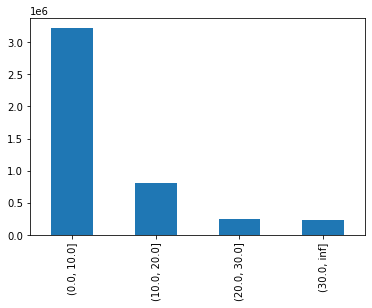

In [44]:
company_df["age_cut"] = pd.cut(company_df["age"],[0,10,20,30,np.inf])
company_df[["CompanyName","age_cut"]]
company_df["age_cut"].value_counts().plot(kind="bar")

# Most of the companies are new I mean between 0 to 10 years

# Q2

In [19]:
company_df[["CompanyName","CompanyStatus","CompanyCategory"]]

,CompanyName,CompanyStatus,CompanyCategory
0,! LIMITED,Active,Private Limited Company
1,! LTD,Active,Private Limited Company
2,!? LTD,Active,Private Limited Company
3,!BIG IMPACT GRAPHICS LIMITED,Active,Private Limited Company
4,!GOBERUB LTD,Active,Private Limited Company
...,...,...,...
4970021,“THE GREENHOUSE” COMPANY LTD,Active,Private Limited Company
4970022,“THE SKULL” SAUCE COMPANY LTD,Active,Private Limited Company
4970023,“WORLD PLANET” HUMANITARIAN EXPEDITION GROUP LTD,Active,"PRI/LTD BY GUAR/NSC (Private, limited by guara..."
4970024,€URO IMPORTS LIMITED,Active,Private Limited Company


In [20]:
company_df["CompanyStatus"].value_counts()

Active                                              4645544
Active - Proposal to Strike off                      222080
Liquidation                                           96874
In Administration                                      2609
Live but Receiver Manager on at least one charge       1274
Voluntary Arrangement                                   817
In Administration/Administrative Receiver               334
RECEIVERSHIP                                            193
ADMINISTRATION ORDER                                    130
ADMINISTRATIVE RECEIVER                                 112
In Administration/Receiver Manager                       41
RECEIVER MANAGER / ADMINISTRATIVE RECEIVER               16
VOLUNTARY ARRANGEMENT / RECEIVER MANAGER                  1
VOLUNTARY ARRANGEMENT / ADMINISTRATIVE RECEIVER           1
Name: CompanyStatus, dtype: int64

In [21]:
company_df["CompanyCategory"].value_counts()

Private Limited Company                                                                      4621055
PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)                         107251
Limited Partnership                                                                            55053
Limited Liability Partnership                                                                  52514
PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)      40742
Charitable Incorporated Organisation                                                           25155
Community Interest Company                                                                     24957
Other company type                                                                             13478
Registered Society                                                                             11826
Public Limited Company                                                                     

# Q3

In [22]:
map_df

,Company Number
0,SC640374
1,10953461
2,3204427
3,8466039
4,6337417
...,...
105,11457383
106,SC660098
107,12634115
108,8182582


In [25]:
company_df[" CompanyNumber"] = company_df[" CompanyNumber"].str.strip()
map_df["Company Number"] = map_df["Company Number"].str.strip()
merged_df = pd.merge(company_df,map_df,left_on=" CompanyNumber",right_on="Company Number",how="inner")
merged_df

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,Company Number
0,SUPERSAVERS SCOTLAND LTD,SC640374,NaN,NaN,2ND FLOOR,129 NELSON STREET,GLASGOW,OTHER (NON US),SCOTLAND,G5 8DZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15/09/2021,01/09/2020,SC640374
1,SUPERSEED VENTURES LLP,OC424095,NaN,NaN,27 OLD GLOUCESTER STREET,NaN,LONDON,NaN,UNITED KINGDOM,WC1N 3AX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/09/2021,11/09/2020,OC424095
2,SUPERSET ENGINEERING LTD.,SC397849,NaN,NaN,SWIRE HOUSE SOUTER HEAD ROAD,ALTENS INDUSTRIAL ESTATE,ABERDEEN,NaN,SCOTLAND,AB12 3LF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/04/2022,15/04/2021,SC397849
3,SUSTAINABLE COTTENHAM,CE021293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CE021293
4,TEN-EIGHTYSIX LTD,SC583083,NaN,NaN,8 LAMONT ROAD,NaN,GLASGOW,NaN,SCOTLAND,G21 3PN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/12/2021,03/12/2020,SC583083
5,ØYESTREETWEAR LTD,SC672095,NaN,NaN,7 BERNADETTE CRESCENT,NaN,MOTHERWELL,NaN,UNITED KINGDOM,ML1 5AH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/09/2021,NaN,SC672095
6,ÚIR CONSULTING LTD,NI662497,NaN,NaN,48 GILFORD ROAD,PORTADOWN,CRAIGAVON,NaN,NORTHERN IRELAND,BT63 5EF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/07/2022,23/06/2021,NI662497
7,ÚNA: UNITING NARRATIVES WITH ARTS,CS004604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS004604
8,“Q-STAR TELENERGY HOLDINGS LIMITED,SC655320,NaN,NaN,FLAT 1/2 21 REDSHANK AVENUE,RENFREW,RENFREWSHIRE,NaN,SCOTLAND,PA4 8SG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/03/2022,20/02/2021,SC655320
9,“THE SKULL” SAUCE COMPANY LTD,SC660098,NaN,NaN,21/5 BURNBRAE PLACE,NaN,EDINBURGH,MIDLOTHIAN,NaN,EH12 8AR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/05/2021,NaN,SC660098


In [28]:
company_df[company_df[" CompanyNumber"]==8466039]

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate


In [29]:
company_df[" CompanyNumber"].unique()

array(['12778855', '08209948', '11399177', ..., '12634115', '08182582',
       '07835383'], dtype=object)

In [54]:
merged_df["Full Address"] = merged_df["RegAddress.CareOf"]+merged_df["RegAddress.POBox"]+merged_df["RegAddress.AddressLine1"]+merged_df[" RegAddress.AddressLine2"]+(merged_df["RegAddress.County"])
merged_df["Full Address"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
Name: Full Address, dtype: object

In [60]:
merged_df.replace(np.nan,"",inplace=True) 
merged_df["Full Address"]=merged_df["RegAddress.CareOf"]+merged_df["RegAddress.POBox"]+merged_df["RegAddress.AddressLine1"]+merged_df[" RegAddress.AddressLine2"]+merged_df["RegAddress.County"]+merged_df["RegAddress.Country"]+merged_df["RegAddress.PostCode"]
merged_df


,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,Company Number,Full Address
0,SUPERSAVERS SCOTLAND LTD,SC640374,,,2ND FLOOR,129 NELSON STREET,GLASGOW,OTHER (NON US),SCOTLAND,G5 8DZ,...,,,,,,,15/09/2021,01/09/2020,SC640374,2ND FLOOR129 NELSON STREETOTHER (NON US)SCOTLA...
1,SUPERSEED VENTURES LLP,OC424095,,,27 OLD GLOUCESTER STREET,,LONDON,,UNITED KINGDOM,WC1N 3AX,...,,,,,,,25/09/2021,11/09/2020,OC424095,27 OLD GLOUCESTER STREETUNITED KINGDOMWC1N 3AX
2,SUPERSET ENGINEERING LTD.,SC397849,,,SWIRE HOUSE SOUTER HEAD ROAD,ALTENS INDUSTRIAL ESTATE,ABERDEEN,,SCOTLAND,AB12 3LF,...,,,,,,,29/04/2022,15/04/2021,SC397849,SWIRE HOUSE SOUTER HEAD ROADALTENS INDUSTRIAL ...
3,SUSTAINABLE COTTENHAM,CE021293,,,,,,,,,...,,,,,,,,,CE021293,
4,TEN-EIGHTYSIX LTD,SC583083,,,8 LAMONT ROAD,,GLASGOW,,SCOTLAND,G21 3PN,...,,,,,,,17/12/2021,03/12/2020,SC583083,8 LAMONT ROADSCOTLANDG21 3PN
5,ØYESTREETWEAR LTD,SC672095,,,7 BERNADETTE CRESCENT,,MOTHERWELL,,UNITED KINGDOM,ML1 5AH,...,,,,,,,07/09/2021,,SC672095,7 BERNADETTE CRESCENTUNITED KINGDOMML1 5AH
6,ÚIR CONSULTING LTD,NI662497,,,48 GILFORD ROAD,PORTADOWN,CRAIGAVON,,NORTHERN IRELAND,BT63 5EF,...,,,,,,,07/07/2022,23/06/2021,NI662497,48 GILFORD ROADPORTADOWNNORTHERN IRELANDBT63 5EF
7,ÚNA: UNITING NARRATIVES WITH ARTS,CS004604,,,,,,,,,...,,,,,,,,,CS004604,
8,“Q-STAR TELENERGY HOLDINGS LIMITED,SC655320,,,FLAT 1/2 21 REDSHANK AVENUE,RENFREW,RENFREWSHIRE,,SCOTLAND,PA4 8SG,...,,,,,,,06/03/2022,20/02/2021,SC655320,FLAT 1/2 21 REDSHANK AVENUERENFREWSCOTLANDPA4 8SG
9,“THE SKULL” SAUCE COMPANY LTD,SC660098,,,21/5 BURNBRAE PLACE,,EDINBURGH,MIDLOTHIAN,,EH12 8AR,...,,,,,,,11/05/2021,,SC660098,21/5 BURNBRAE PLACEMIDLOTHIANEH12 8AR


In [61]:
merged_df[["CompanyName","SICCode.SicText_1", "SICCode.SicText_2","SICCode.SicText_3","SICCode.SicText_4","Full Address"]]

,CompanyName,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4,Full Address
0,SUPERSAVERS SCOTLAND LTD,47190 - Other retail sale in non-specialised s...,,,,2ND FLOOR129 NELSON STREETOTHER (NON US)SCOTLA...
1,SUPERSEED VENTURES LLP,None Supplied,,,,27 OLD GLOUCESTER STREETUNITED KINGDOMWC1N 3AX
2,SUPERSET ENGINEERING LTD.,71121 - Engineering design activities for indu...,,,,SWIRE HOUSE SOUTER HEAD ROADALTENS INDUSTRIAL ...
3,SUSTAINABLE COTTENHAM,None Supplied,,,,
4,TEN-EIGHTYSIX LTD,43290 - Other construction installation,,,,8 LAMONT ROADSCOTLANDG21 3PN
5,ØYESTREETWEAR LTD,47710 - Retail sale of clothing in specialised...,,,,7 BERNADETTE CRESCENTUNITED KINGDOMML1 5AH
6,ÚIR CONSULTING LTD,62020 - Information technology consultancy act...,,,,48 GILFORD ROADPORTADOWNNORTHERN IRELANDBT63 5EF
7,ÚNA: UNITING NARRATIVES WITH ARTS,None Supplied,,,,
8,“Q-STAR TELENERGY HOLDINGS LIMITED,61200 - Wireless telecommunications activities,61300 - Satellite telecommunications activities,61900 - Other telecommunications activities,62090 - Other information technology service a...,FLAT 1/2 21 REDSHANK AVENUERENFREWSCOTLANDPA4 8SG
9,“THE SKULL” SAUCE COMPANY LTD,10840 - Manufacture of condiments and seasonings,,,,21/5 BURNBRAE PLACEMIDLOTHIANEH12 8AR


EX-2

In [ ]:
1.)a.)SELECT MERCHANT_NAME from transactions GROUP BY USER_ID ORDER BY TRANSACTION_DATE ASC;
  b.) SELECT COUNT(USER_ID) from (SELECT TRANSACTION_DATE,USER_ID from transactions GROUP BY USER_ID ORDER BY TRANSACTION_DATE ASC) WHERE DAYOFWEEK(TRANSACTION_DATE)==2;

2.) SELECT *, ROW_NUMBER() OVER (PARTITION BY   from transactions
                                 
 3.) SELECT TOP(25) PERCENT, USER_ID, SUM(AMOUNT) "Total" from transactions GROUP BY USER_ID ORDER BY 2 DESC;